In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import functional as F
import numpy as np
import tqdm

from dataset import Dataset
ds = Dataset(file_path='./data', window_size = 20, test_size = 1000)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.43it/s]


In [2]:
(train_features, train_labels), (test_features, test_labels) = ds.get_dataset()
print(train_features.shape, train_labels.shape)
print(test_features.shape, test_labels.shape)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.79s/it]


['KRW-BTC'] are combined as training set
completed
torch.Size([65728, 20, 22]) torch.Size([65728, 3])
torch.Size([980, 20, 22]) torch.Size([980, 3])


In [3]:
from sklearn.model_selection import train_test_split
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size = 0.1)
print(train_features.shape, train_labels.shape)
print(val_features.shape, val_labels.shape)

torch.Size([59155, 20, 22]) torch.Size([59155, 3])
torch.Size([6573, 20, 22]) torch.Size([6573, 3])


## Dataset

In [4]:
train_dataset = TensorDataset(train_features, train_labels)
val_dataset = TensorDataset(val_features, val_labels)
test_dataset = TensorDataset(test_features, test_labels)

## DataLoader

In [5]:
BATCH_SIZE = 256
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False)

## Model

In [6]:
from model import Model
model = Model(input_size = train_features.shape[2], recurrent_hidden_size = 128, dense_hidden_size = 256, output_size = 3)

## Train

In [7]:
from torch.optim import Adam
from train import Trainer

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)
model.to(device)

cuda:0


Model(
  (gru): GRU(22, 128, num_layers=2, batch_first=True, bidirectional=True)
  (dense1): Linear(in_features=256, out_features=256, bias=True)
  (dense2): Linear(in_features=256, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=False)
)

In [8]:
MSE = nn.MSELoss(reduction = 'mean')
trainer = Trainer(model, train_loader, val_loader, criterion = MSE, optimizer = Adam,
                  epochs = 100, lr = 0.00001, device = device)
trainer.fit()

  4%|███▏                                                                              | 9/232 [00:00<00:02, 81.00it/s]

epoch: 1/100, train_loss: 0.00007023, val_loss: 0.00000849


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.83it/s]

epoch: 2/100, train_loss: 0.00000781, val_loss: 0.00000689


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.26it/s]

epoch: 3/100, train_loss: 0.00000677, val_loss: 0.00000617


  4%|███▏                                                                              | 9/232 [00:00<00:02, 82.11it/s]

epoch: 4/100, train_loss: 0.00000615, val_loss: 0.00000567


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.52it/s]

epoch: 5/100, train_loss: 0.00000574, val_loss: 0.00000533


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.31it/s]

epoch: 6/100, train_loss: 0.00000545, val_loss: 0.00000505


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.03it/s]

epoch: 7/100, train_loss: 0.00000518, val_loss: 0.00000484


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.66it/s]

epoch: 8/100, train_loss: 0.00000501, val_loss: 0.00000465


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.82it/s]

epoch: 9/100, train_loss: 0.00000483, val_loss: 0.00000452


  4%|███▏                                                                              | 9/232 [00:00<00:02, 85.63it/s]

epoch: 10/100, train_loss: 0.00000472, val_loss: 0.00000439


  4%|███▏                                                                              | 9/232 [00:00<00:02, 81.00it/s]

epoch: 11/100, train_loss: 0.00000459, val_loss: 0.00000429


  4%|███▏                                                                              | 9/232 [00:00<00:02, 80.15it/s]

epoch: 12/100, train_loss: 0.00000450, val_loss: 0.00000422


  4%|███▏                                                                              | 9/232 [00:00<00:02, 86.45it/s]

epoch: 13/100, train_loss: 0.00000442, val_loss: 0.00000414


  4%|███▏                                                                              | 9/232 [00:00<00:02, 85.14it/s]

epoch: 14/100, train_loss: 0.00000435, val_loss: 0.00000407


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.44it/s]

epoch: 15/100, train_loss: 0.00000428, val_loss: 0.00000401


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.08it/s]

epoch: 16/100, train_loss: 0.00000426, val_loss: 0.00000398


  8%|██████▎                                                                          | 18/232 [00:00<00:02, 85.39it/s]

epoch: 17/100, train_loss: 0.00000417, val_loss: 0.00000391


  4%|███▏                                                                              | 9/232 [00:00<00:02, 85.23it/s]

epoch: 18/100, train_loss: 0.00000411, val_loss: 0.00000388


  3%|██                                                                                | 6/232 [00:00<00:04, 56.02it/s]

epoch: 19/100, train_loss: 0.00000408, val_loss: 0.00000385


  4%|███▏                                                                              | 9/232 [00:00<00:02, 86.46it/s]

epoch: 20/100, train_loss: 0.00000404, val_loss: 0.00000379


  4%|███▏                                                                              | 9/232 [00:00<00:02, 85.64it/s]

epoch: 21/100, train_loss: 0.00000399, val_loss: 0.00000375


  4%|███▏                                                                              | 9/232 [00:00<00:02, 81.74it/s]

epoch: 22/100, train_loss: 0.00000395, val_loss: 0.00000371


  3%|██▊                                                                               | 8/232 [00:00<00:02, 79.91it/s]

epoch: 23/100, train_loss: 0.00000392, val_loss: 0.00000373


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.21it/s]

epoch: 24/100, train_loss: 0.00000389, val_loss: 0.00000365


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.35it/s]

epoch: 25/100, train_loss: 0.00000387, val_loss: 0.00000362


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.36it/s]

epoch: 26/100, train_loss: 0.00000383, val_loss: 0.00000360


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.37it/s]

epoch: 27/100, train_loss: 0.00000380, val_loss: 0.00000358


  4%|███▏                                                                              | 9/232 [00:00<00:02, 85.64it/s]

epoch: 28/100, train_loss: 0.00000378, val_loss: 0.00000354


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.26it/s]

epoch: 29/100, train_loss: 0.00000375, val_loss: 0.00000352


  4%|███▏                                                                              | 9/232 [00:00<00:02, 85.63it/s]

epoch: 30/100, train_loss: 0.00000372, val_loss: 0.00000350


  4%|███▏                                                                              | 9/232 [00:00<00:02, 80.28it/s]

epoch: 31/100, train_loss: 0.00000371, val_loss: 0.00000347


  4%|███▏                                                                              | 9/232 [00:00<00:02, 85.23it/s]

epoch: 32/100, train_loss: 0.00000367, val_loss: 0.00000350


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.83it/s]

epoch: 33/100, train_loss: 0.00000364, val_loss: 0.00000346


  4%|███▏                                                                              | 9/232 [00:00<00:02, 81.23it/s]

epoch: 34/100, train_loss: 0.00000363, val_loss: 0.00000341


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.26it/s]

epoch: 35/100, train_loss: 0.00000361, val_loss: 0.00000340


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.83it/s]

epoch: 36/100, train_loss: 0.00000359, val_loss: 0.00000340


  4%|███▏                                                                              | 9/232 [00:00<00:02, 81.73it/s]

epoch: 37/100, train_loss: 0.00000356, val_loss: 0.00000338


  3%|██▊                                                                               | 8/232 [00:00<00:02, 77.22it/s]

epoch: 38/100, train_loss: 0.00000354, val_loss: 0.00000334


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.83it/s]

epoch: 39/100, train_loss: 0.00000352, val_loss: 0.00000332


  7%|█████▉                                                                           | 17/232 [00:00<00:02, 83.31it/s]

epoch: 40/100, train_loss: 0.00000350, val_loss: 0.00000332


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.63it/s]

epoch: 41/100, train_loss: 0.00000349, val_loss: 0.00000327


  4%|███▏                                                                              | 9/232 [00:00<00:02, 86.46it/s]

epoch: 42/100, train_loss: 0.00000345, val_loss: 0.00000326


  4%|███▏                                                                              | 9/232 [00:00<00:02, 80.28it/s]

epoch: 43/100, train_loss: 0.00000343, val_loss: 0.00000325


  4%|███▏                                                                              | 9/232 [00:00<00:02, 85.63it/s]

epoch: 44/100, train_loss: 0.00000341, val_loss: 0.00000325


  4%|███▏                                                                              | 9/232 [00:00<00:02, 81.01it/s]

epoch: 45/100, train_loss: 0.00000340, val_loss: 0.00000321


  4%|███▏                                                                              | 9/232 [00:00<00:02, 82.11it/s]

epoch: 46/100, train_loss: 0.00000339, val_loss: 0.00000319


  4%|███▏                                                                              | 9/232 [00:00<00:02, 81.74it/s]

epoch: 47/100, train_loss: 0.00000337, val_loss: 0.00000318


  4%|███▏                                                                              | 9/232 [00:00<00:02, 82.49it/s]

epoch: 48/100, train_loss: 0.00000337, val_loss: 0.00000318


  4%|███▏                                                                              | 9/232 [00:00<00:02, 81.74it/s]

epoch: 49/100, train_loss: 0.00000332, val_loss: 0.00000315


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.43it/s]

epoch: 50/100, train_loss: 0.00000329, val_loss: 0.00000314


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.82it/s]

epoch: 51/100, train_loss: 0.00000327, val_loss: 0.00000315


  4%|███▏                                                                              | 9/232 [00:00<00:02, 85.55it/s]

epoch: 52/100, train_loss: 0.00000325, val_loss: 0.00000309


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.03it/s]

epoch: 53/100, train_loss: 0.00000323, val_loss: 0.00000308


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.25it/s]

epoch: 54/100, train_loss: 0.00000322, val_loss: 0.00000307


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.12it/s]

epoch: 55/100, train_loss: 0.00000319, val_loss: 0.00000311


  4%|███▏                                                                              | 9/232 [00:00<00:02, 82.45it/s]

epoch: 56/100, train_loss: 0.00000317, val_loss: 0.00000304


  3%|██▊                                                                               | 8/232 [00:00<00:02, 79.14it/s]

epoch: 57/100, train_loss: 0.00000315, val_loss: 0.00000299


  4%|███▏                                                                              | 9/232 [00:00<00:02, 81.07it/s]

epoch: 58/100, train_loss: 0.00000313, val_loss: 0.00000298


  4%|███▏                                                                              | 9/232 [00:00<00:02, 82.76it/s]

epoch: 59/100, train_loss: 0.00000311, val_loss: 0.00000297


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.26it/s]

epoch: 60/100, train_loss: 0.00000309, val_loss: 0.00000296


  8%|██████▎                                                                          | 18/232 [00:00<00:02, 85.03it/s]

epoch: 61/100, train_loss: 0.00000308, val_loss: 0.00000292


  4%|███▏                                                                              | 9/232 [00:00<00:02, 82.87it/s]

epoch: 62/100, train_loss: 0.00000305, val_loss: 0.00000292


  4%|███▏                                                                              | 9/232 [00:00<00:02, 85.79it/s]

epoch: 63/100, train_loss: 0.00000303, val_loss: 0.00000291


  4%|███▏                                                                              | 9/232 [00:00<00:02, 82.11it/s]

epoch: 64/100, train_loss: 0.00000303, val_loss: 0.00000287


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.64it/s]

epoch: 65/100, train_loss: 0.00000299, val_loss: 0.00000294


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.64it/s]

epoch: 66/100, train_loss: 0.00000298, val_loss: 0.00000286


  4%|███▏                                                                              | 9/232 [00:00<00:02, 81.79it/s]

epoch: 67/100, train_loss: 0.00000296, val_loss: 0.00000282


  3%|██▊                                                                               | 8/232 [00:00<00:02, 78.35it/s]

epoch: 68/100, train_loss: 0.00000294, val_loss: 0.00000280


  4%|███▏                                                                              | 9/232 [00:00<00:02, 81.72it/s]

epoch: 69/100, train_loss: 0.00000294, val_loss: 0.00000304


  4%|███▏                                                                              | 9/232 [00:00<00:02, 81.75it/s]

epoch: 70/100, train_loss: 0.00000292, val_loss: 0.00000279


  4%|███▏                                                                              | 9/232 [00:00<00:02, 89.97it/s]

epoch: 71/100, train_loss: 0.00000289, val_loss: 0.00000277


  4%|███▏                                                                              | 9/232 [00:00<00:02, 89.02it/s]

epoch: 72/100, train_loss: 0.00000287, val_loss: 0.00000273


  4%|███▏                                                                              | 9/232 [00:00<00:02, 89.03it/s]

epoch: 73/100, train_loss: 0.00000283, val_loss: 0.00000271


  3%|██                                                                                | 6/232 [00:00<00:04, 56.02it/s]

epoch: 74/100, train_loss: 0.00000282, val_loss: 0.00000271


  4%|███▏                                                                              | 9/232 [00:00<00:02, 89.47it/s]

epoch: 75/100, train_loss: 0.00000280, val_loss: 0.00000269


  4%|███▏                                                                              | 9/232 [00:00<00:02, 88.15it/s]

epoch: 76/100, train_loss: 0.00000278, val_loss: 0.00000267


  8%|██████▎                                                                          | 18/232 [00:00<00:02, 87.60it/s]

epoch: 77/100, train_loss: 0.00000276, val_loss: 0.00000266


  4%|███▏                                                                              | 9/232 [00:00<00:02, 84.25it/s]

epoch: 78/100, train_loss: 0.00000274, val_loss: 0.00000268


  8%|██████▎                                                                          | 18/232 [00:00<00:02, 86.05it/s]

epoch: 79/100, train_loss: 0.00000272, val_loss: 0.00000263


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.67it/s]

epoch: 80/100, train_loss: 0.00000270, val_loss: 0.00000261


  8%|██████▎                                                                          | 18/232 [00:00<00:02, 87.38it/s]

epoch: 81/100, train_loss: 0.00000270, val_loss: 0.00000263


  4%|███▏                                                                              | 9/232 [00:00<00:02, 86.26it/s]

epoch: 82/100, train_loss: 0.00000267, val_loss: 0.00000256


  4%|███▏                                                                              | 9/232 [00:00<00:02, 88.58it/s]

epoch: 83/100, train_loss: 0.00000264, val_loss: 0.00000257


  4%|███▏                                                                              | 9/232 [00:00<00:02, 86.33it/s]

epoch: 84/100, train_loss: 0.00000266, val_loss: 0.00000256


  4%|███▏                                                                              | 9/232 [00:00<00:02, 89.02it/s]

epoch: 85/100, train_loss: 0.00000262, val_loss: 0.00000252


  4%|███▏                                                                              | 9/232 [00:00<00:02, 87.83it/s]

epoch: 86/100, train_loss: 0.00000259, val_loss: 0.00000250


  8%|██████▎                                                                          | 18/232 [00:00<00:02, 89.10it/s]

epoch: 87/100, train_loss: 0.00000257, val_loss: 0.00000249


  4%|███▏                                                                              | 9/232 [00:00<00:02, 87.59it/s]

epoch: 88/100, train_loss: 0.00000255, val_loss: 0.00000246


  4%|███▏                                                                              | 9/232 [00:00<00:02, 85.22it/s]

epoch: 89/100, train_loss: 0.00000254, val_loss: 0.00000245


  4%|███▏                                                                              | 9/232 [00:00<00:02, 83.28it/s]

epoch: 90/100, train_loss: 0.00000251, val_loss: 0.00000246


  4%|███▏                                                                              | 9/232 [00:00<00:02, 86.46it/s]

epoch: 91/100, train_loss: 0.00000250, val_loss: 0.00000242


  4%|███▏                                                                              | 9/232 [00:00<00:02, 88.74it/s]

epoch: 92/100, train_loss: 0.00000249, val_loss: 0.00000241


  4%|███▏                                                                              | 9/232 [00:00<00:02, 86.52it/s]

epoch: 93/100, train_loss: 0.00000247, val_loss: 0.00000244


  4%|███▏                                                                              | 9/232 [00:00<00:02, 86.45it/s]

epoch: 94/100, train_loss: 0.00000246, val_loss: 0.00000237


  4%|███▏                                                                              | 9/232 [00:00<00:02, 86.83it/s]

epoch: 95/100, train_loss: 0.00000243, val_loss: 0.00000235


  4%|███▍                                                                             | 10/232 [00:00<00:02, 91.73it/s]

epoch: 96/100, train_loss: 0.00000241, val_loss: 0.00000242


  8%|██████▋                                                                          | 19/232 [00:00<00:02, 91.32it/s]

epoch: 97/100, train_loss: 0.00000240, val_loss: 0.00000231


  4%|███▏                                                                              | 9/232 [00:00<00:02, 86.92it/s]

epoch: 98/100, train_loss: 0.00000238, val_loss: 0.00000236


  4%|███▏                                                                              | 9/232 [00:00<00:02, 85.84it/s]

epoch: 99/100, train_loss: 0.00000235, val_loss: 0.00000229


100%|████████████████████████████████████████████████████████████████████████████████| 232/232 [00:02<00:00, 89.68it/s]

epoch: 100/100, train_loss: 0.00000235, val_loss: 0.00000229
best mse : 0.00000229


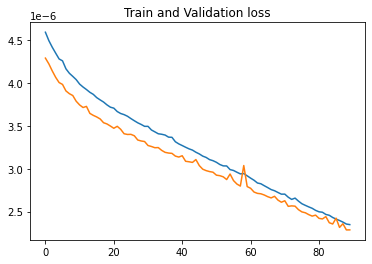

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

history = trainer.history()

plt.plot(history['train_loss'][10:])
plt.plot(history['val_loss'][10:])
plt.title('Train and Validation loss')
plt.show()

## Evaluation

In [10]:
trainer.evaluation(test_loader, device)

mse : 1.2540418765638606e-06


## model save

In [11]:
model = trainer.get_best_model()
model.to('cpu')
torch.save(model.state_dict(), 'model.pt')